<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.2.1: Bagging

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find an answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.9667
    - **ROC AUC**  = 0.9614
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ than **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, laborious, iterative and interactive process. It is part of the process to repeat, review and change when finding a dead-end.

## Scenario: Predicting Breast Cancer
The dataset you are going to be using for this laboratory is popularly known as the **Wisconsin Breast Cancer** dataset. The task related to it is Classification.

The dataset contains a total number of _10_ features labelled in either **benign** or **malignant** classes. The features have _699_ instances out of which _16_ feature values are missing. The dataset only contains numeric values.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

In [1]:
print('1. List the given or obvious questions.')
print('  - Is the diagnosis going to be benign based on the clump thickness, uniformity of cell size, uniformity fo cell shape, marginal adhesion, bare nuclei?')
print('  - Is bagging the best predictor to predict to breast cancer?')
print('2. Choose the one question that should be answered')
print('  - Whether the person got a cancer')

1. List the given or obvious questions.
  - Is the diagnosis going to be benign based on the clump thickness, uniformity of cell size, uniformity fo cell shape, marginal adhesion, bare nuclei?
  - Is bagging the best predictor to predict to breast cancer?
2. Choose the one question that should be answered
  - Whether the person got a cancer


# Step 2: Find the Data
### Wisconsin Breast Cancer DataSet
- **Citation Request**

    This breast cancer databases was obtained from the **University of Wisconsin Hospitals**, **Madison** from **Dr. William H. Wolberg**. If you publish results when using this database, then please include this information in your acknowledgements.

- **Title**

    Wisconsin Breast Cancer Database (January 8, 1991)

- **Sources**
    - **Creator**
            Dr. William H. Wolberg (physician)
            University of Wisconsin Hospitals
            Madison, Wisconsin
            USA
    - **Donor**
            Olvi Mangasarian (mangasarian@cs.wisc.edu)
            Received by David W. Aha (aha@cs.jhu.edu)
    - **Date**
            15 July 1992
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [2]:
# Import libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn import decomposition

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, scale
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.neighbors import KNeighborsClassifier

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

from collections import Counter

from sklearn.utils import resample

%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

In [3]:
columns = ['id',
          'Clump_Thickness',
          'Uniformity_of_Cell_Size',
          'Uniformity_of_Cell_Shape',
          'Marginal_Adhesion',
          'Single_Epithelial_Cell_Size',
          'Bare_Nuclei',
          'Bland_Chromatin',
          'Normal_Nucleoli',
          'Mitoses',
          'Class']

In [4]:
csv = '../DATA/breast-cancer-wisconsin-data-old.csv'
df = pd.read_csv(csv, names = columns)
df.head()

,id,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
df.shape

(699, 11)

# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [6]:
# Number of features
print(f'Number of features:\n{len(df.columns)}')

Number of features:
11


In [7]:
# Data types
print('Data types\n', df.dtypes)

Data types
 id                              int64
Clump_Thickness                 int64
Uniformity_of_Cell_Size         int64
Uniformity_of_Cell_Shape        int64
Marginal_Adhesion               int64
Single_Epithelial_Cell_Size     int64
Bare_Nuclei                    object
Bland_Chromatin                 int64
Normal_Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object


In [8]:
# drop row
df = df[df['Bare_Nuclei'] != '?']
df['Bare_Nuclei'] = df['Bare_Nuclei'].astype(np.int64)
df.dtypes

id                             int64
Clump_Thickness                int64
Uniformity_of_Cell_Size        int64
Uniformity_of_Cell_Shape       int64
Marginal_Adhesion              int64
Single_Epithelial_Cell_Size    int64
Bare_Nuclei                    int64
Bland_Chromatin                int64
Normal_Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

In [9]:
# null values
df.isnull().sum()

id                             0
Clump_Thickness                0
Uniformity_of_Cell_Size        0
Uniformity_of_Cell_Shape       0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64

In [10]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   id                           683 non-null    int64
 1   Clump_Thickness              683 non-null    int64
 2   Uniformity_of_Cell_Size      683 non-null    int64
 3   Uniformity_of_Cell_Shape     683 non-null    int64
 4   Marginal_Adhesion            683 non-null    int64
 5   Single_Epithelial_Cell_Size  683 non-null    int64
 6   Bare_Nuclei                  683 non-null    int64
 7   Bland_Chromatin              683 non-null    int64
 8   Normal_Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 64.0 KB


In [11]:
# Describe
df.describe()

,id,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [12]:
df.set_index('id', inplace = True)
df.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
id,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


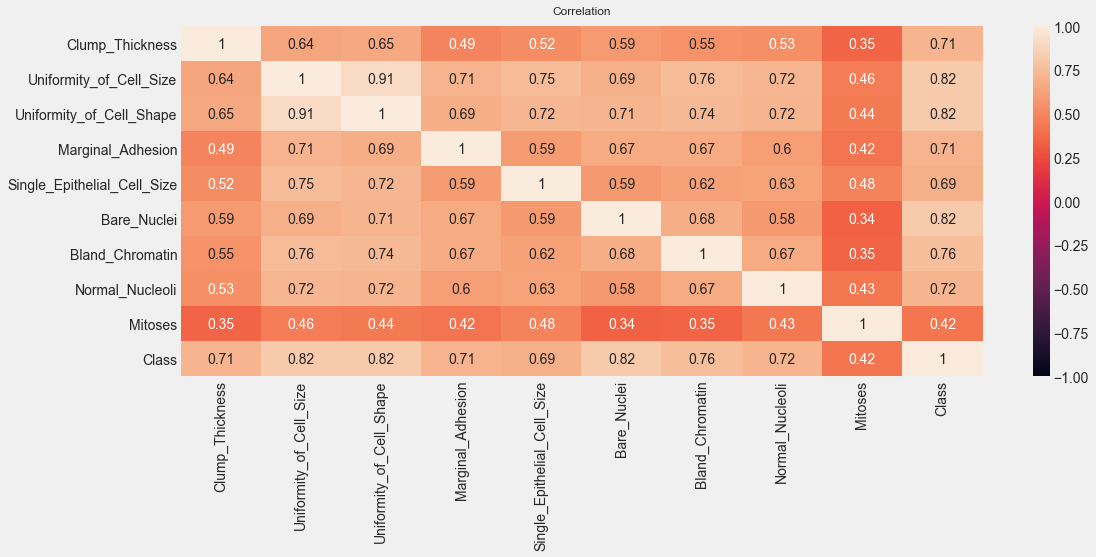

In [13]:
# Increase the size of the map

plt.figure(figsize = (16,6))

heatmap = sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True)

heatmap.set_title('Correlation', fontdict = {'fontsize' : 12}, pad = 12);

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

In [14]:
from sklearn.impute import SimpleImputer

# Convert the DataFrame object into NumPy array otherwise you will not be able t impute
values = df.values

# define the criteria for dealing with the missing values
imputer = SimpleImputer(
    missing_values = np.nan,
    strategy = 'mean'
)

imputedData = imputer.fit_transform(values)

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
scaled_value = scaler.fit_transform(imputedData)
df_n = pd.DataFrame.from_records(scaled_value, columns = df.columns)
df_n

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,0.444444,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.000000,0.000000,0.0
1,0.444444,0.333333,0.333333,0.444444,0.666667,1.000000,0.222222,0.111111,0.000000,0.0
2,0.222222,0.000000,0.000000,0.000000,0.111111,0.111111,0.222222,0.000000,0.000000,0.0
3,0.555556,0.777778,0.777778,0.000000,0.222222,0.333333,0.222222,0.666667,0.000000,0.0
4,0.333333,0.000000,0.000000,0.222222,0.111111,0.000000,0.222222,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
678,0.222222,0.000000,0.000000,0.000000,0.222222,0.111111,0.000000,0.000000,0.000000,0.0
679,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.000000,0.0
680,0.444444,1.000000,1.000000,0.222222,0.666667,0.222222,0.777778,1.000000,0.111111,1.0
681,0.333333,0.777778,0.555556,0.333333,0.222222,0.333333,1.000000,0.555556,0.000000,1.0


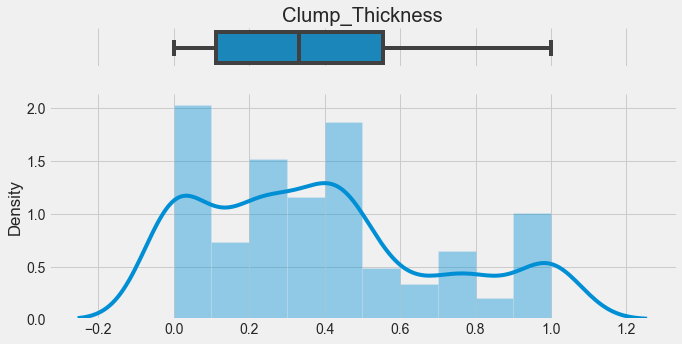

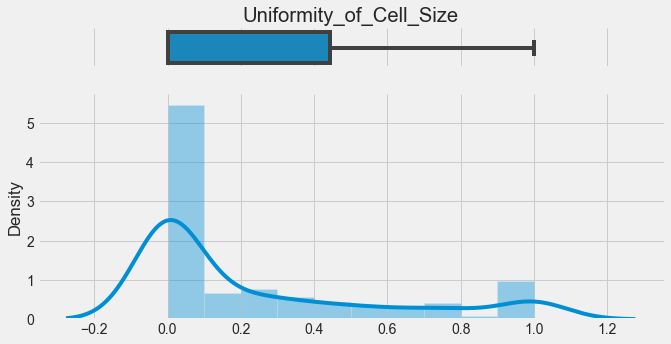

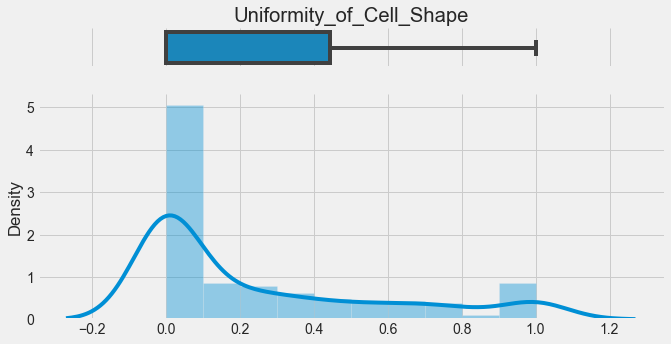

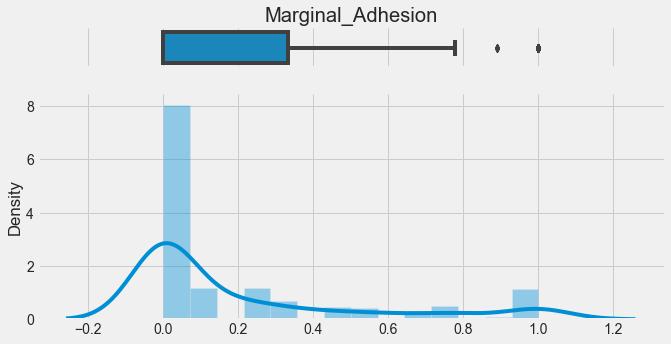

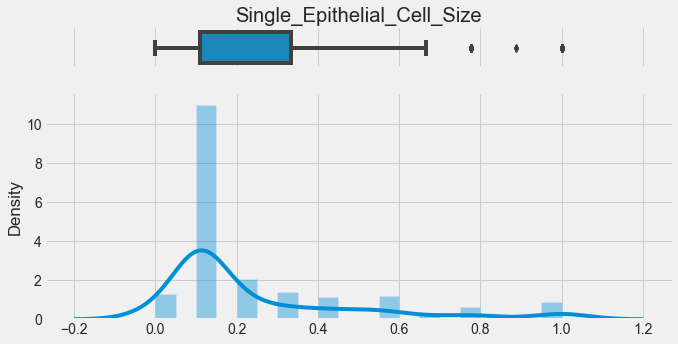

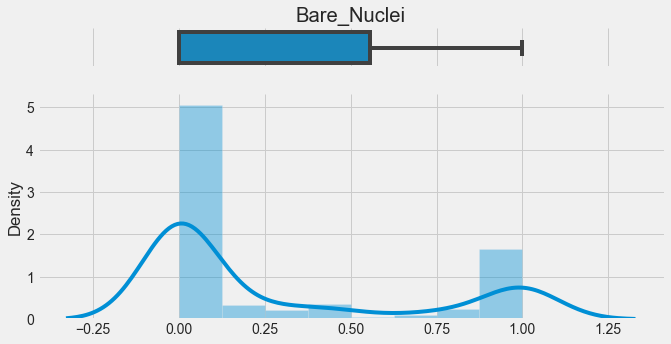

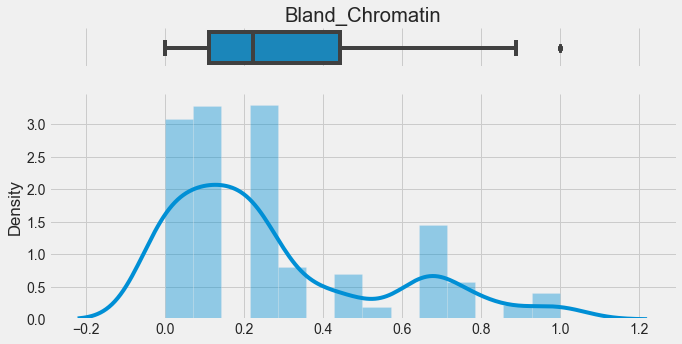

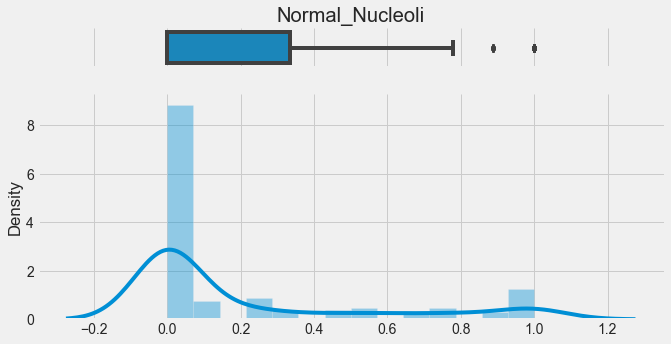

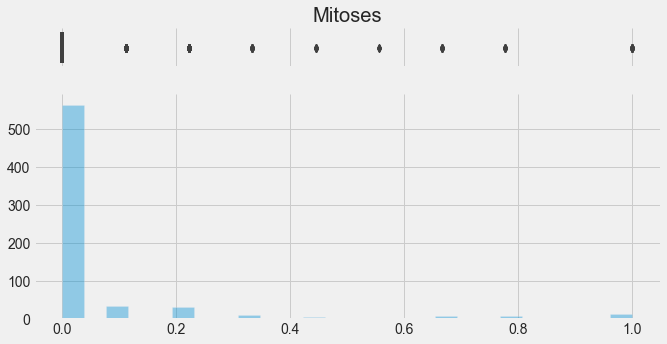

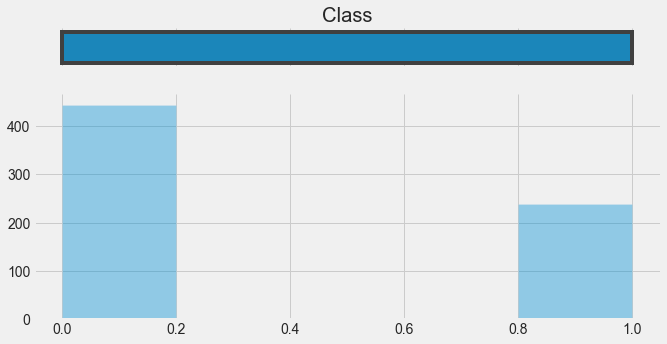

In [16]:
# Check if there is outlier
for c in df_n.columns:

    fig, ax = plt.subplots(2, 
                           figsize = (10, 5), 
                           sharex = True, 
                           gridspec_kw = {'height_ratios': (0.15, 0.85)})
    
    ax_box = ax[0]
    ax_box = sns.boxplot(df_n[c], ax = ax_box)
    ax_box.set(title = c, yticks= [], xlabel = '')
    sns.despine(ax = ax_box, left = True)
    
    ax_hist = ax[1]
    if c not in  ['Class', 'Mitoses']:
        ax_hist = sns.distplot(df_n[c], ax = ax_hist)
    else:
        ax_hist = sns.distplot(df_n[c], ax = ax_hist, kde = False)
    
    ax_hist.set(xlabel = '')
    sns.despine(ax = ax_hist)
    
plt.show()

In [17]:
# Define Predictor and Target
target = 'Class'
X = df_n.drop(columns= target)
y = df_n[target]

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

In [18]:
print('- What are the input variables (features)?')
print(f'  - %s' % ', '.join(X.columns))
print('- Is there an output variable (label)?')
print(' - %s' % ('yes' if target else 'No'))
print(' - %s' % target)
print(' - %s' % y.dtypes)
print('- What type of Modelling is it?')
print(' - [%s] Supervised' % ('x' if target else ' '))
print(' - [%s] Unsupervised' % (' ' if target else 'x'))
print('- What type of modelling is it?')
print(' - [%s] Regression' % ('x' if y.dtypes == 'object' else ' '))
print(' - [%s] Classification (binary)' % ('x' if (y.dtype != 'object') and (len(y.unique()) == 2) else ' '))
print(' - [%s] Classification (multi-class)' % ('x' if(y.dtype == 'object') and (len(y.unique()) != 2) else ' '))
print(' - [%s] Clustering' % (' ' if target else 'x'))

- What are the input variables (features)?
  - Clump_Thickness, Uniformity_of_Cell_Size, Uniformity_of_Cell_Shape, Marginal_Adhesion, Single_Epithelial_Cell_Size, Bare_Nuclei, Bland_Chromatin, Normal_Nucleoli, Mitoses
- Is there an output variable (label)?
 - yes
 - Class
 - float64
- What type of Modelling is it?
 - [x] Supervised
 - [ ] Unsupervised
- What type of modelling is it?
 - [ ] Regression
 - [x] Classification (binary)
 - [ ] Classification (multi-class)
 - [ ] Clustering


# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1122030, stratify = y)

# Step 8: Define and Fit Models

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [24]:
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_score
import sklearn.metrics as metrics

In [25]:

def evaluate(model, X_train, X_test, y_train, y_test):
   
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    print('Accuracy score:            %.4f' % accuracy_score(y_test, y_test_pred))
    print('Precision score:           %.4f' % precision_score(y_test, y_test_pred))
    print('TRAINING RESULTS: \n==========================================')
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict = True))
    print(f'TRAINING SCORE: {model.score(X_train, y_train)}')
    print(f'CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}')
    print(f'ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred)}')
    print(f'CLASSIFICATION REPORT:\n{clf_report}')
    
    print('TESTING RESULTS: \n==========================================')
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict = True))
    print(f'TEST SCORE: {model.score(X_test, y_test)}')
    print(f'CONFUSION MATRIX: \n{confusion_matrix(y_test, y_test_pred)}')
    print(f'ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}')
    print(f'CLASSIFICATION REPORT:\n{clf_report}')
    
    # roc curve
    
    y_test_pred_proba = model.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_test_pred_proba[:, 1])
    
    plt.figure(figsize = [15, 15])
    
    model_auc = auc(fpr, tpr)
    
    plt.plot(fpr, tpr,  label = 'ROC curve model (area = %0.5f)' %model_auc, linewidth = 4)
    plt.xlim([-0.05, 1.0])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate', fontsize = 18)
    plt.ylabel('True Positive Rate', fontsize = 18)
    plt.title('Receiver Operating Characteristic: M', fontsize = 18)
    plt.legend(loc = 'lower right')
    plt.show()

In [26]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 10, random_state = 7, shuffle = True)
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
results = cross_val_score(tree, X_train, y_train, cv = kfold)
print('Decision Tree Cross Validation mean : %.4f' % results.mean())



Decision Tree Cross Validation mean : 0.9415


In [27]:
bagging_clf = BaggingClassifier(base_estimator = tree,
                               n_estimators = 100,
                               random_state = 7)
bagging_clf.fit(X_train, y_train)
results = cross_val_score(bagging_clf, X_train, y_train, cv = kfold)
print('Bagging Classifier Cross Validation mean : %.4f' % results.mean())

Bagging Classifier Cross Validation mean : 0.9666


# Step 9: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

Accuracy score:            0.9659
Precision score:           0.9577
TRAINING RESULTS: 
TRAINING SCORE: 1.0
CONFUSION MATRIX:
[[311   0]
 [  0 167]]
ACCURACY SCORE:
1.0
CLASSIFICATION REPORT:
             0.0    1.0  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    311.0  167.0       1.0      478.0         478.0
TESTING RESULTS: 
TEST SCORE: 0.9658536585365853
CONFUSION MATRIX: 
[[130   3]
 [  4  68]]
ACCURACY SCORE:
0.9659
CLASSIFICATION REPORT:
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.970149   0.957746  0.965854    0.963948      0.965793
recall       0.977444   0.944444  0.965854    0.960944      0.965854
f1-score     0.973783   0.951049  0.965854    0.962416      0.965798
support    133.000000  72.000000  0.965854  205.000000    205.000000


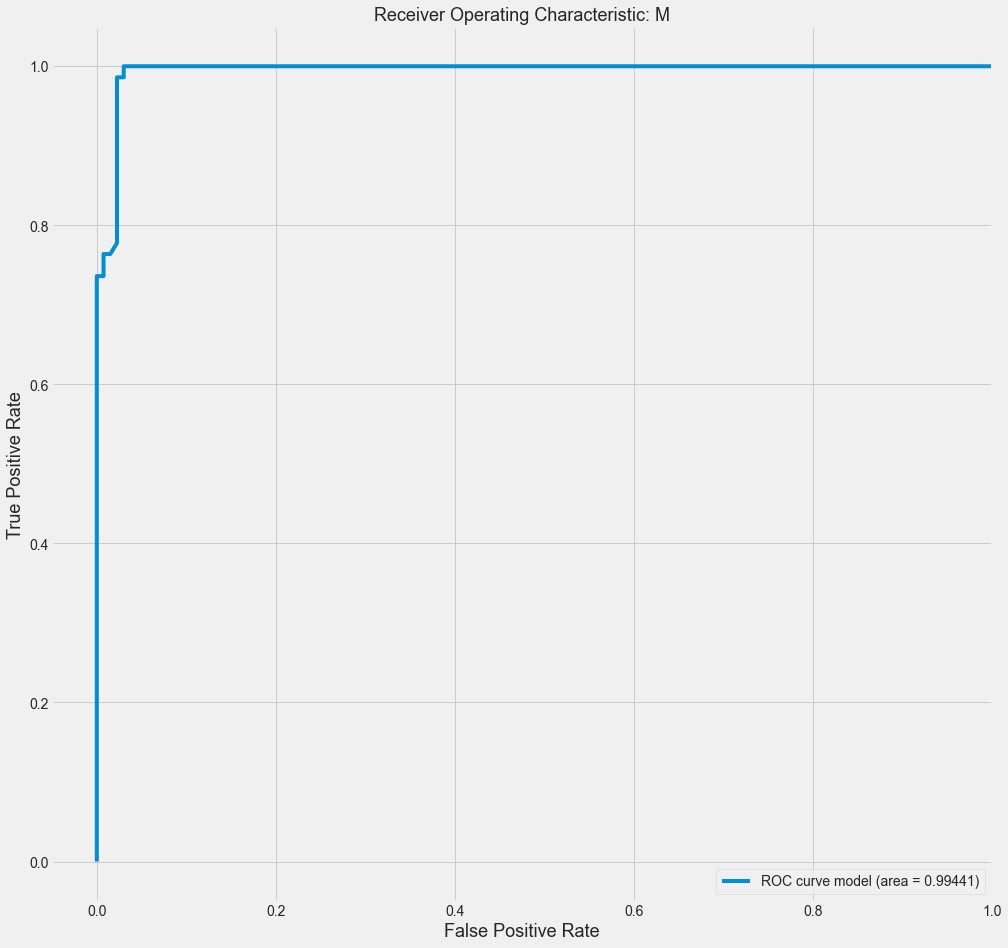

In [28]:
evaluate(bagging_clf, X_train, X_test, y_train, y_test)

# Step 10: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

Accuracy score:            0.9659
Precision score:           0.9577
TRAINING RESULTS: 
TRAINING SCORE: 1.0
CONFUSION MATRIX:
[[311   0]
 [  0 167]]
ACCURACY SCORE:
1.0
CLASSIFICATION REPORT:
             0.0    1.0  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    311.0  167.0       1.0      478.0         478.0
TESTING RESULTS: 
TEST SCORE: 0.9658536585365853
CONFUSION MATRIX: 
[[130   3]
 [  4  68]]
ACCURACY SCORE:
0.9659
CLASSIFICATION REPORT:
                  0.0        1.0  accuracy   macro avg  weighted avg
precision    0.970149   0.957746  0.965854    0.963948      0.965793
recall       0.977444   0.944444  0.965854    0.960944      0.965854
f1-score     0.973783   0.951049  0.965854    0.962416      0.965798
support    133.000000  72.000000  0.965854  205.000000    205.000000


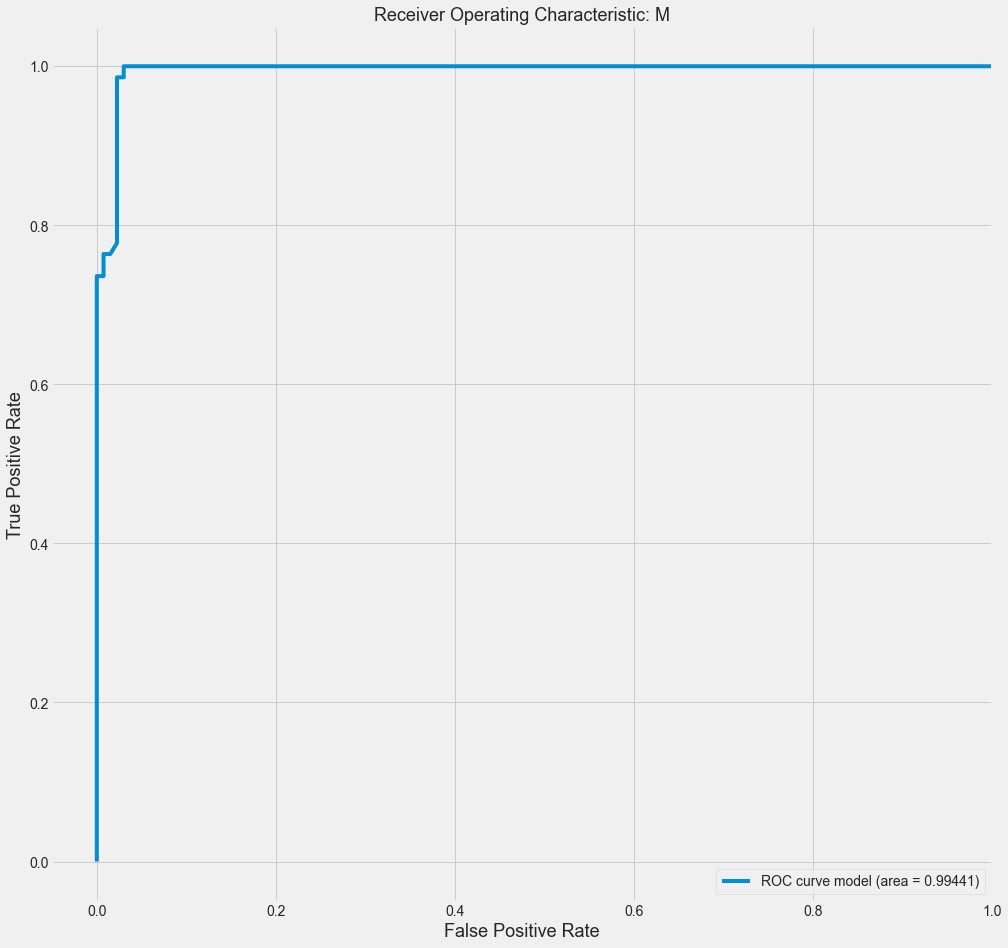

In [29]:
evaluate(bagging_clf, X_train, X_test, y_train, y_test)

# Step 11: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



